In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("C:/Users/abhin/Downloads/CarPrices/CarPrice_Assignment.csv")

In [59]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [60]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [61]:
df.info()
#this indicates there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [62]:
#getting car company name from car name as it might be an important feature for the price 
df['carCompany'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [63]:
# Dropping car name as we have extracted the company name
if 'car_ID' in df.columns and 'CarName' in df.columns:
    df.drop(['car_ID', 'CarName'], axis=1, inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [64]:
#convert categorical data to numerical data
df_encoded = pd.get_dummies(df)
print(df_encoded.head())

   symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0          3       88.6      168.8      64.1       48.8        2548   
1          3       88.6      168.8      64.1       48.8        2548   
2          1       94.5      171.2      65.5       52.4        2823   
3          2       99.8      176.6      66.2       54.3        2337   
4          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  ...  carCompany_porsche  \
0         130       3.47    2.68               9.0  ...               False   
1         130       3.47    2.68               9.0  ...               False   
2         152       2.68    3.47               9.0  ...               False   
3         109       3.19    3.40              10.0  ...               False   
4         136       3.19    3.40               8.0  ...               False   

   carCompany_renault  carCompany_saab  carCompany_subaru  carCompany_toyota  \
0               Fa

In [65]:
# # Convert True/False to 1/0 in the one-hot encoded columns
# df_encoded = df.replace({True: 1, False: 0})
# print(df_encoded.head())

In [66]:
#X contains everything except the price column
X = df_encoded.drop('price',axis=1) 
#Y contains the price column
Y = df_encoded['price']

In [72]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'Y_test shape: {Y_test.shape}')



X_train shape: (164, 80)
X_test shape: (41, 80)
Y_train shape: (164,)
Y_test shape: (41,)


In [73]:
#Feature Scaling

X = (X - X.mean())/X.std()

In [74]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, Y):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient Descent
        for _ in range(self.n_iterations):
            # Predicted values
            Y_predicted = np.dot(X, self.weights) + self.bias
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (Y_predicted - Y))
            db = (1 / n_samples) * np.sum(Y_predicted - Y)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def score(self, X, Y):
        Y_pred = self.predict(X)
        mse = np.mean((Y - Y_pred) ** 2)
        return mse



In [77]:
# Convert DataFrame to NumPy arrays
X_train_np = X_train.fillna(X_train.mean()).values
Y_train_np = Y_train.fillna(Y_train.mean()).values
X_test_np = X_test.fillna(X_test.mean()).values
Y_test_np = Y_test.fillna(Y_test.mean()).values

# Create an instance of the model with adjusted learning rate and iterations
model = LinearRegression(learning_rate=0.001, n_iterations=5000)

# Fit the model on the training data
model.fit(X_train_np, Y_train_np)

# Making predictions on the test data
predictions = model.predict(X_test_np)

# Display the first 10 predictions
print(predictions[:10])


[26552.27329637 19658.82791711  9363.79460752 14251.23300585
 26975.7975178   6270.91696961  6374.55447501  6880.53867702
  7482.05721927 -3213.57539563]


In [78]:
# Making predictions
predictions = model.predict(X_test_np)

# Display the first 10 predictions
print(predictions[:10])

[26552.27329637 19658.82791711  9363.79460752 14251.23300585
 26975.7975178   6270.91696961  6374.55447501  6880.53867702
  7482.05721927 -3213.57539563]


In [79]:
# Convert testing DataFrame to NumPy arrays
X_test_np = X_test.values

# Making predictions on the testing dataset
test_predictions = model.predict(X_test_np)

# Display the first 10 predictions
print(test_predictions[:10])


[26552.27329637 19658.82791711  9363.79460752 14251.23300585
 26975.7975178   6270.91696961  6374.55447501  6880.53867702
  7482.05721927 -3213.57539563]


In [80]:
#error function
def mean_squared_error(Y_true, Y_pred):
    return np.mean((Y_true - Y_pred) ** 2)

# Convert testing DataFrame to NumPy arrays
Y_test_np = Y_test.values

# Making predictions on the testing dataset
test_predictions = model.predict(X_test.values)

# Calculate MSE using testing data
mse = mean_squared_error(Y_test_np, test_predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 19703936.094864033


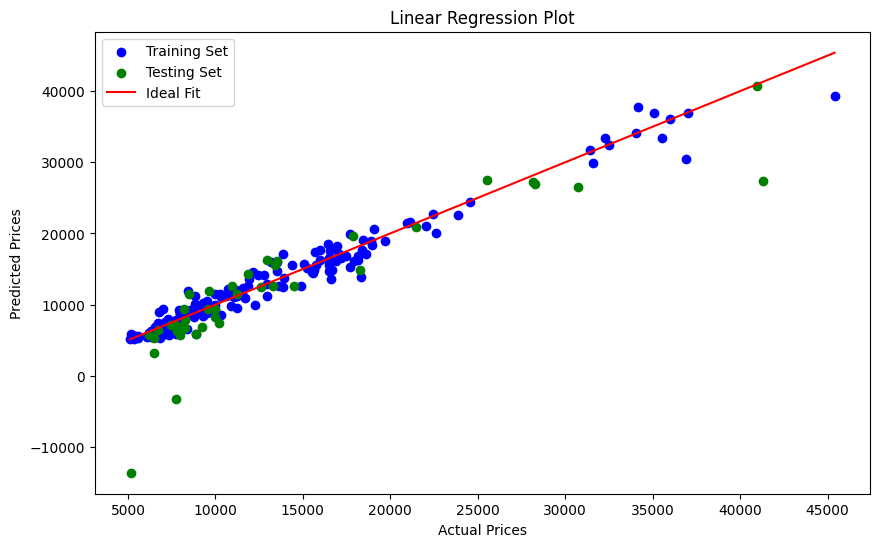

In [81]:
# Remove NaN values from training and testing datasets
train_plot_df = pd.DataFrame({'Actual': Y_train_np, 'Predicted': model.predict(X_train_np)}).dropna()
test_plot_df = pd.DataFrame({'Actual': Y_test_np, 'Predicted': test_predictions}).dropna()

# Plot the regression plot
plt.figure(figsize=(10, 6))
plt.scatter(train_plot_df['Actual'], train_plot_df['Predicted'], color='blue', label='Training Set')
plt.scatter(test_plot_df['Actual'], test_plot_df['Predicted'], color='green', label='Testing Set')
plt.plot([min(Y_train_np.min(), Y_test_np.min()), max(Y_train_np.max(), Y_test_np.max())], 
         [min(Y_train_np.min(), Y_test_np.min()), max(Y_train_np.max(), Y_test_np.max())], 
         color='red', label='Ideal Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression Plot')
plt.legend()
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Convert testing DataFrame to NumPy arrays
Y_test_np = Y_test.values

# Making predictions on the testing dataset
test_predictions = model.predict(X_test.values)

# Calculate evaluation metrics
mse = mean_squared_error(Y_test_np, test_predictions)
mae = mean_absolute_error(Y_test_np, test_predictions)
r2 = r2_score(Y_test_np, test_predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²) Score: {r2}')

Mean Squared Error (MSE): 19703936.094864033
Mean Absolute Error (MAE): 2547.6938155710404
R-squared (R²) Score: 0.7504062261421833
